<a href="https://colab.research.google.com/github/kuletha-rk/univariate/blob/master/Univariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Wine Quality data Analysis
: by Rishabh Kuletha
The dataset is related to red variants of the Portuguese "Vinho Verde" wine.

The features represented through columns are as follows:

    fixed acidity
    volatile acidity
    citric acid
    residual sugar
    chlorides
    free sulfur dioxide
    total sulfur dioxide
    density
    pH
    sulphates
    alcohol
    quality (score between 0 and 10) (based on sensory data)

Dataset Source :

Original Owners

Forina, M. et al, PARVUS - An Extendible Package for Data Exploration, Classification and Correlation. Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 16147 Genoa, Italy.

Donor

Stefan Aeberhard, email: stefan '@' coral.cs.jcu.edu.au

Step 1 - Importing Libraries
Here I am simply importing tools which will help me visualize and process the data.
Tools I will be using:
1. Pandas
2. Numpy
3. Seaborn
4. Matplotlib
5. Collection
6. Sklearn (later)

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

#*Getting the Data*


In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

#step 2 - *exploring the dataset*

The data has following 12 variables 
size is ()
12 columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


From above exploration of data, we know:
1. Data has no null values, data is populated.
2. Variable 'quality' has int64 which shows quality is an ordinal variable wherein 1 is lowest and 10 is highest.

#head is used for visualising sample data, as below.
first 5 entries are shown as sample.

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#Statistical Summary of Data
-Mean,Mode,Median and Other Central tendecies
- T i.e. Transpose switches rows and columns

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


#analysing the above table , following are the observations:
1. There may be an outlier, where the value of standard deviation is unusually lower or higher than the mean.
*Free Sulfur Dioxide* ,
*Total Sulfur Dioxide* ,
*fixed Acidity*

2. Difference between 75th percentile and Max value is way higher for:
*free Sulfur dioxide* , and
*total sulfur dioxide*

3. Denisty has lowest SD, which may mean it has Normal data distribution.

Let's check by doing Univariate analysis.

In [0]:
def describe2(x):
    x1 = x.describe(percentiles = [0.5]).to_frame().T
    x1['mode'] = x.mode().values
    x1['variance'] = x1['std'] ** 2
    x1['skew'] = x.skew()
    return x1.T

#quality analysis:


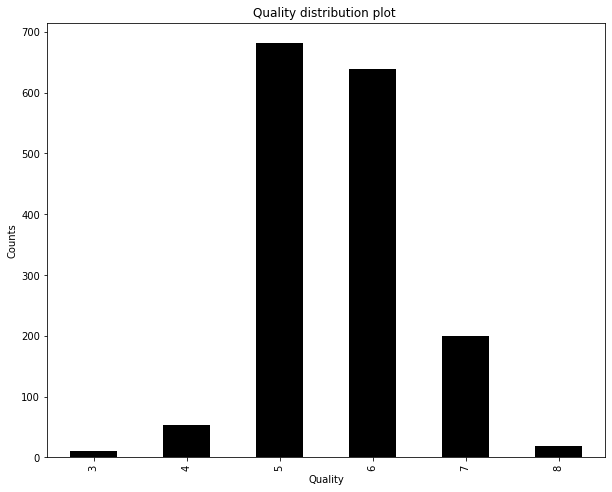

In [7]:
plt.figure(figsize = (10 , 8))
plt.title("Quality distribution plot ")
plt.xlabel('Quality')
plt.ylabel("Counts")
df['quality'].value_counts().sort_index().plot(kind = 'bar',color = 'black')
plt.show()

In [8]:
describe2(df['quality'])

,quality
count,1599.000000
mean,5.636023
std,0.807569
min,3.000000
50%,6.000000
max,8.000000
mode,5.000000
variance,0.652168
skew,0.217802


In [9]:
((df['quality'].value_counts(normalize = True) * 100).round(2).astype('str') + '%').sort_index().to_frame()

,quality
3,0.63%
4,3.31%
5,42.59%
6,39.9%
7,12.45%
8,1.13%


#Observations:

1. ~43% of the ratings are 5.
2. There is no 1,2 ratings.
3. ~40% of the ratings are at 6.

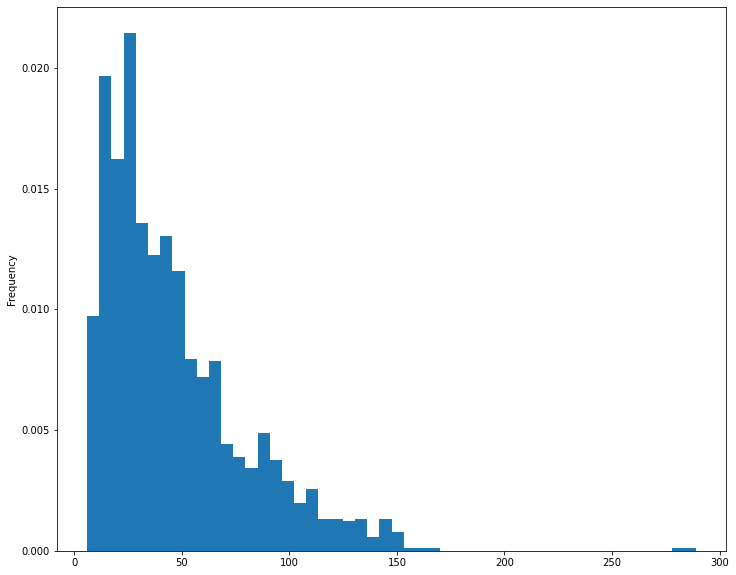

In [10]:
plt.figure(figsize=(12,10))
df['total sulfur dioxide'].plot(kind = 'hist',bins = 50 , density = True)
plt.show()


#obs of total sulphur dioxide:
1. There is a huge gap between min and max values.
2. Outlier may be present.
3. Graph shows left skewness.

#What needs to be done:
1. We do a Univariate analysis.
2. We use logarithmic transformation to *handle the outlier*.

In [11]:
describe2(df['total sulfur dioxide'])


,total sulfur dioxide
count,1599.000000
mean,46.467792
std,32.895324
min,6.000000
50%,38.000000
max,289.000000
mode,28.000000
variance,1082.102373
skew,1.515531


In [12]:
describe2(df[df['total sulfur dioxide'] < 200]['total sulfur dioxide'])

,total sulfur dioxide
count,1597.000000
mean,46.170946
std,31.826498
min,6.000000
50%,38.000000
max,165.000000
mode,28.000000
variance,1012.925960
skew,1.184365


#obs from univariate analysis for "total Sulfur dioxide":
1. there are outliers
2. data is left skewed
3. while considering < 200, our count drops by two less observations.
#**how did we treat outliers**
1. we did the log transformation to standardize the data.


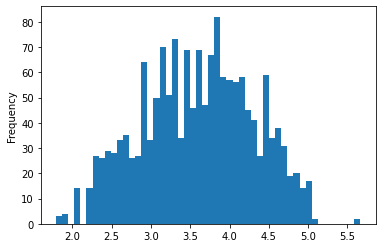

In [13]:
np.log(df['total sulfur dioxide']).plot(kind = 'hist' ,bins = 50)

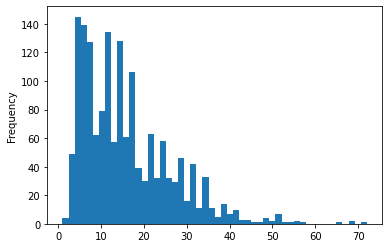

In [14]:
df['free sulfur dioxide'].plot(kind = 'hist',bins = 50)

#Observations after analysing graph for 'free sulfur dioxide':
1. data is left skewed.
2. Outliers are presend in the data.
3. huge gap between min and max values

In [15]:
describe2(df['free sulfur dioxide'])

,free sulfur dioxide
count,1599.000000
mean,15.874922
std,10.460157
min,1.000000
50%,14.000000
max,72.000000
mode,6.000000
variance,109.414884
skew,1.250567


In [16]:
describe2(df[df['total sulfur dioxide'] <200] ['total sulfur dioxide'])

,total sulfur dioxide
count,1597.000000
mean,46.170946
std,31.826498
min,6.000000
50%,38.000000
max,165.000000
mode,28.000000
variance,1012.925960
skew,1.184365


#how we treat outliers:
1. We do a logarithmic transformation of data.
2. We compare data having < 200 units as value with original data.

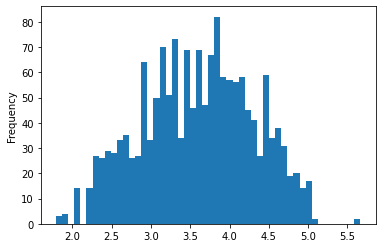

In [17]:
np.log(df['total sulfur dioxide']).plot(kind = 'hist', bins = 50)

#checking effect of "alcohol" level on quality

In [18]:
describe2(df['alcohol'])

,alcohol
count,1599.000000
mean,10.422983
std,1.065668
min,8.400000
50%,10.200000
max,14.900000
mode,9.500000
variance,1.135647
skew,0.860829


#final obs:

1. We observed that fixed acidity,total sulfur dioxide have outliers.
2. Better representation of data suggest we may drop these outliers.
